# News Headlines Sentiment

In [34]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

Python-dotenv could not parse statement starting at line 2


In [35]:
# Read your api key environment variable & print type of api key

api_key = os.getenv("news_api")

print(type(api_key))

<class 'str'>


In [36]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [37]:
# Fetch the Bitcoin news articles and view number of results
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language="en", page_size=100, sort_by="relevancy")
bitcoin_headlines["totalResults"]

5157

In [38]:
# Fetch the Ethereum news articles and view number of results
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en", page_size=100, sort_by="relevancy")
ethereum_headlines["totalResults"]

1361

In [39]:
# Create the Bitcoin sentiment scores DataFrame and preview
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [40]:
# Create the Ethereum sentiment scores DataFrame and preview
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...
4,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...


In [41]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,99.000000,99.000000,99.00000,99.000000
mean,0.159841,0.015414,0.93199,0.052576
std,0.331286,0.046197,0.07498,0.064127
min,-0.946800,0.000000,0.63700,0.000000
25%,0.000000,0.000000,0.86350,0.000000
50%,0.000000,0.000000,0.94800,0.000000
75%,0.401900,0.000000,1.00000,0.117000
max,0.811800,0.363000,1.00000,0.209000


In [42]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.235460,0.019167,0.904000,0.076833
std,0.333306,0.044601,0.092507,0.078462
min,-0.779200,0.000000,0.653000,0.000000
25%,0.000000,0.000000,0.844500,0.000000
50%,0.226300,0.000000,0.926000,0.070500
75%,0.493900,0.000000,1.000000,0.129000
max,0.883400,0.239000,1.000000,0.347000


### Questions:

Q: Which coin had the highest mean positive score?

A: Based on the above Ethereum had the higher positive score.

Q: Which coin had the highest compound score?

A: Based on the above Ehtereum had the higher compound score.

Q. Which coin had the highest positive score?

A: Based on the bove Ethereum had the higher positive score

---

# Tokenizer

In [43]:
#imports

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [44]:
# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also','file','photo'}

In [45]:
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    sw.update(sw_addons)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [46]:
# Create a new tokens column for bitcoin

bitcoin_token = bitcoin_df

word_tokenized = []

for story in bitcoin_token['text']:
    token = tokenizer(story)
    word_tokenized.append({'tokens':token})
    
tokens_df= pd.DataFrame(word_tokenized)
bitcoin_token['tokens'] = tokens_df

bitcoin_token.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, worksas, come, close, crypt..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."


In [47]:
# Create a new tokens column for ethereum
ethereum_token = ethereum_df

word_tokenized = []

for story in bitcoin_token['text']:
    token = tokenizer(story)
    word_tokenized.append({'tokens':token})
    
tokens_df= pd.DataFrame(word_tokenized)
ethereum_token['tokens'] = tokens_df

ethereum_token.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[reaching, previous, alltime, high, november, ..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[almost, three, year, day, since, price, bitco..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[everything, dumb, worksas, come, close, crypt..."
4,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[november, absolutely, massive, twomonth, rall..."


# NGrams and Frequency Analysis

In [48]:
# Imports
from collections import Counter
from nltk import ngrams

In [49]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigram = bitcoin_df['text']

def bigram_counter(bitcoin_bigram): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(bitcoin_bigram)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(bitcoin_bigram)

,bigram,count
0,"(virtual, currency)",38
1,"(illustration, taken)",31
2,"(currency, bitcoin)",29
3,"(reuters, bitcoin)",28
4,"(bitcoin, seen)",25
5,"(char, reuters)",23
6,"(reuters, stafffile)",17
7,"(representation, virtual)",17
8,"(taken, november)",16
9,"(november, reutersdado)",16


In [50]:
# Generate the Ethereum N-grams where N=2
ethereum_bigram = ethereum_df['text']

def bigram_counter(ethereum_bigram): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(ethereum_bigram)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(ethereum_bigram)

,bigram,count
0,"(virtual, currency)",13
1,"(currency, bitcoin)",10
2,"(illustration, taken)",10
3,"(bitcoin, seen)",9
4,"(char, bitcoin)",8
5,"(york, reuters)",7
6,"(reuters, bitcoin)",7
7,"(char, ethereum)",7
8,"(reutersdado, ruvicillustrationlondon)",6
9,"(ruvicillustrationlondon, reuters)",6


In [51]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [52]:
# Get the top 10 words for Bitcoin
bitcoin_words = []

for article in bitcoin_df['tokens']:
    for words in article:
        bitcoin_words.append(words)
        
token_count(bitcoin_words)

[('char', 99),
 ('bitcoin', 93),
 ('reuters', 81),
 ('currency', 47),
 ('taken', 41),
 ('virtual', 38),
 ('illustration', 34),
 ('reutersdado', 33),
 ('seen', 32),
 ('cryptocurrency', 24)]

In [53]:
# Get the top 10 words for Ethereum
ethereum_words = []

for article in ethereum_df['tokens']:
    for words in article:
        ethereum_words.append(words)
        
token_count(ethereum_words)

[('char', 96),
 ('bitcoin', 93),
 ('reuters', 79),
 ('currency', 47),
 ('taken', 41),
 ('virtual', 38),
 ('illustration', 34),
 ('reutersdado', 33),
 ('seen', 32),
 ('cryptocurrency', 22)]

# Word Clouds

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

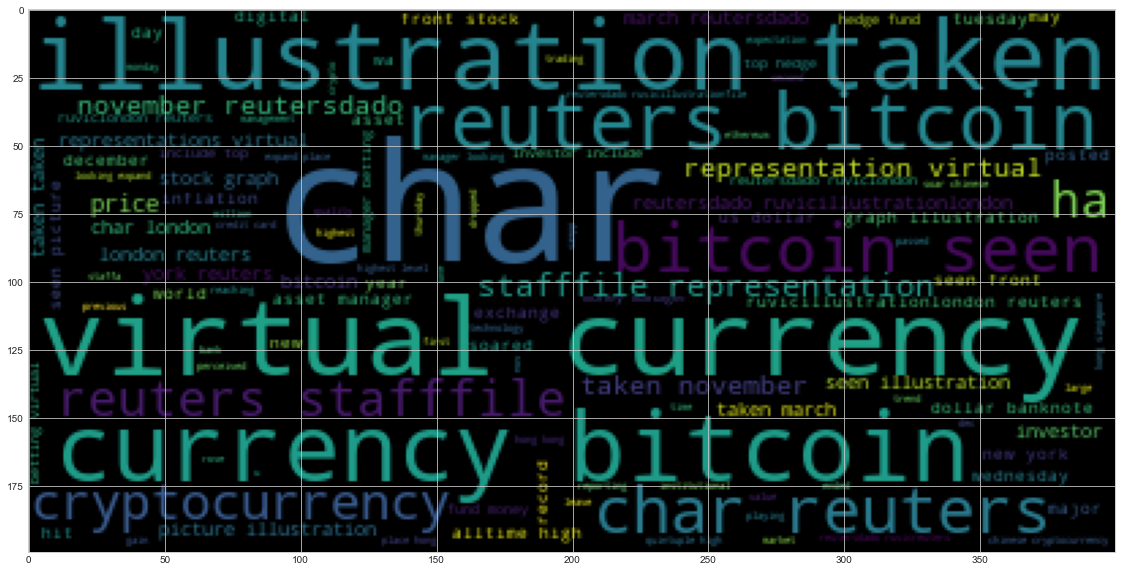

In [55]:
# Generate the Bitcoin word cloud
bitcoin_cloud = ' '.join(bitcoin_words)

wc = WordCloud().generate(bitcoin_cloud)
plt.imshow(wc)

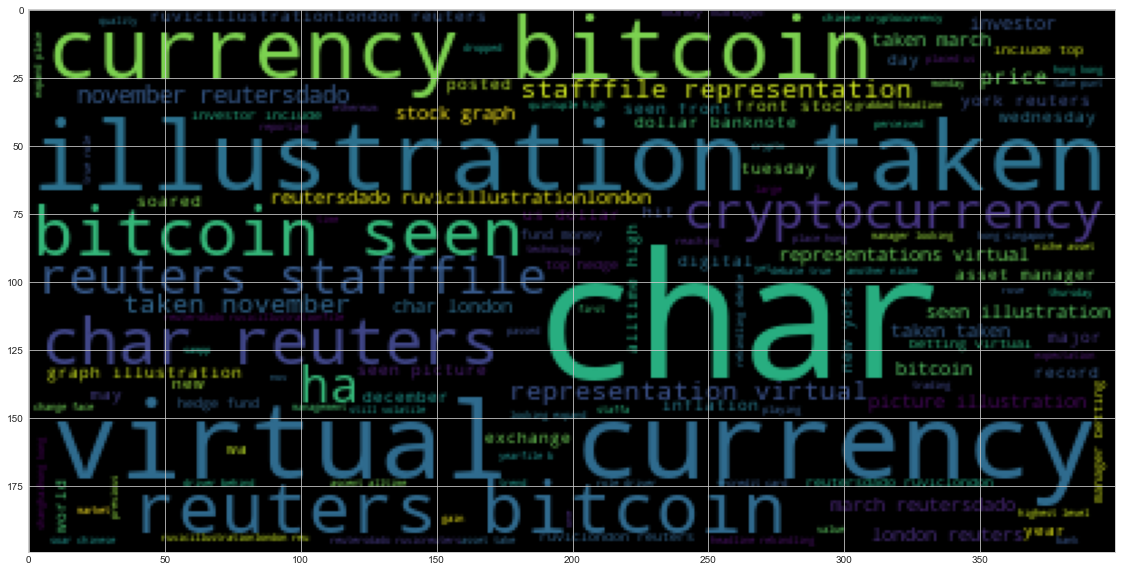

In [56]:
# Generate the Ethereum word cloud
ethereum_cloud = ' '.join(ethereum_words)

wc = WordCloud().generate(ethereum_cloud)
plt.imshow(wc)

# Named Entity Recognition

In [57]:
# imports
import spacy
from spacy import displacy

In [58]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [59]:
# Concatenate all of the bitcoin text together
bitcoin_ner = " ".join(bitcoin_df.text)
bitcoin_ner

'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars] Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars] Everything is dumb until it works.\r\nAs 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 2

In [60]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_ner)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [61]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [62]:
# List all Entities
for entity in bitcoin_ner.ents:
    print(entity.text, entity.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
2020 DATE
late-year DATE
Bitcoin GPE
over $23,000 MONEY
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Bitcoin GPE
20,000 MONEY
14,800 MONEY
more than 170% PERCENT
this year DATE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Grayson Blackmon / PERSON
the year DATE
the day DATE
Twitter ORG
Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
e

---

## Ethereum NER

In [63]:
# Concatenate all of the ethereum text together
ethereum_ner = " ".join(ethereum_df.text)
ethereum_ner

'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S.… [+1046 chars] FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/D

In [64]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_ner)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [65]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [66]:
# List all Entities
for entity in ethereum_ner.ents:
    print(entity.text, entity.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U